In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import hvplot.pandas
import panel as pn
import holoviews as hv
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import math

In [149]:

DailyVisitor = pd.read_csv('https://tinyurl.com/ChrisCoDV/001188147/VenueDailyVisitors.csv', index_col=0)
DailyVisitor.index = pd.to_datetime(DailyVisitor.index)
#pd.plotting.register_matplotlib_converters()
DailyVisitor_sort = DailyVisitor.reindex(DailyVisitor.max(axis=1).sort_values().index)

#print(data.head())
averageage = pd.read_csv('https://tinyurl.com/ChrisCoDV/001188147/VenueAge.csv', index_col=0)
max_travel = pd.read_csv('https://tinyurl.com/ChrisCoDV/001188147/VenueDistance.csv', index_col=0)
visit_duration = pd.read_csv('https://tinyurl.com/ChrisCoDV/001188147/VenueDuration.csv', index_col=0)
propotion_female = pd.read_csv('https://tinyurl.com/ChrisCoDV/001188147/VenueGender.csv', index_col=0)
avg_spend = pd.read_csv('https://tinyurl.com/ChrisCoDV/001188147/VenueSpend.csv', index_col=0)

In [150]:


combined_data = pd.DataFrame(index = DailyVisitor.columns)

#merge column according thier name
combined_data['VenueAge'] = averageage.values
combined_data['VenueDisatnce'] = max_travel.values
combined_data['VenueDuration'] = visit_duration.values
combined_data['VenueGender'] = propotion_female.values
combined_data['VenueSpend'] = avg_spend.values
combined_data['VenueDailyVisitor'] = DailyVisitor.mean()

In [151]:
print(DailyVisitor.head())
print(combined_data.head())

            CWN  YVW  UFY  YXF  XPE  AWF  XFP  ZFX  ZPL  RDA  ...  WRL  VLS  \
Date                                                          ...             
2019-01-01  267    0   59   72   69  221   66   85   61  492  ...   80   71   
2019-01-02  198    0   71   80   82  135   77   94   57  605  ...   73   76   
2019-01-03  206    0   65   73   66  106   71   93   65  514  ...   80   68   
2019-01-04  153    0   59   77   63   99   66   93   50  254  ...   78   79   
2019-01-05  178    0   67   78   87   51   87   97   63  512  ...   87   47   

            SPF  ZJB  AXM  DKS  XLA  XJT  VRD  YDI  
Date                                                
2019-01-01  746    0   68  213   86   74   64    0  
2019-01-02  414    0   23  188   87   65   52    0  
2019-01-03  507    0   68  149   72   91   63    0  
2019-01-04  276    0   71  114   66   82   58    0  
2019-01-05  261    0   48  109  104   77   56    0  

[5 rows x 40 columns]
     VenueAge  VenueDisatnce  VenueDuration  VenueGe

In [152]:
DailyVisitor.describe()

CWN         YVW         UFY         YXF         XPE         AWF  \
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000   
mean   206.909589   14.964384   65.013699   78.539726   75.095890  136.868493   
std     48.238476   37.032379    9.232190    4.423549   14.051871   46.196477   
min     81.000000    0.000000   38.000000   66.000000   32.000000   21.000000   
25%    171.000000    0.000000   59.000000   75.000000   66.000000  100.000000   
50%    209.000000    0.000000   64.000000   79.000000   75.000000  137.000000   
75%    244.000000    0.000000   71.000000   82.000000   84.000000  172.000000   
max    332.000000  242.000000   92.000000   94.000000  124.000000  244.000000   

              XFP         ZFX         ZPL         RDA  ...         WRL  \
count  365.000000  365.000000  365.000000  365.000000  ...  365.000000   
mean    69.632877   93.520548   30.547945  488.378082  ...   81.147945   
std      8.769767    4.348517   31.169001  118.576606  ...    8.634840   
min     38.000000   80.000000    0.000000  125.000000  ...   59.000000   
25%     64.000000   91.000000    0.000000  405.000000  ...   76.000000   
50%     70.000000   93.000000    0.000000  493.000000  ...   81.000000   
75%     76.000000   96.000000   61.000000  570.000000  ...   87.000000   
max     93.000000  106.000000   80.000000  800.000000  ...  111.000000   

              VLS         SPF         ZJB         AXM         DKS         XLA  \
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000   
mean    67.504110  451.616438   37.594521   59.038356  153.641096   88.356164   
std      7.003775   97.238693   50.847974   12.028065   35.755273   12.790546   
min     47.000000  230.000000    0.000000   23.000000   90.000000   50.000000   
25%     63.000000  379.000000    0.000000   51.000000  115.000000   79.000000   
50%     68.000000  454.000000    1.000000   59.000000  146.000000   88.000000   
75%     73.000000  524.000000   69.000000   67.000000  187.000000   98.000000   
max     88.000000  746.000000  211.000000   94.000000  218.000000  139.000000   

              XJT         VRD         YDI  
count  365.000000  365.000000  365.000000  
mean    83.375342   61.227397   23.090411  
std     12.166832    5.499782   34.272823  
min     49.000000   44.000000    0.000000  
25%     75.000000   57.000000    0.000000  
50%     83.000000   62.000000    0.000000  
75%     91.000000   65.000000   45.000000  
max    127.000000   75.000000  158.000000  

[8 rows x 40 columns]

In [153]:
combined_data.describe()

VenueAge  VenueDisatnce  VenueDuration  VenueGender  VenueSpend  \
count  40.000000      40.000000      40.000000    40.000000   40.000000   
mean   37.200000      12.700000     102.850000    50.900000   19.975000   
std    10.585912      11.449331      23.246229     6.283066    6.806812   
min    21.000000       1.000000      59.000000    41.000000   10.000000   
25%    27.750000       5.750000      86.500000    45.750000   15.750000   
50%    35.000000       8.000000     101.000000    52.000000   19.500000   
75%    48.250000      13.250000     121.500000    56.250000   23.000000   
max    55.000000      52.000000     147.000000    60.000000   36.000000   

       VenueDailyVisitor  
count          40.000000  
mean          126.925137  
std           125.302996  
min            14.241096  
25%            62.355479  
50%            79.843836  
75%           149.498630  
max           488.378082

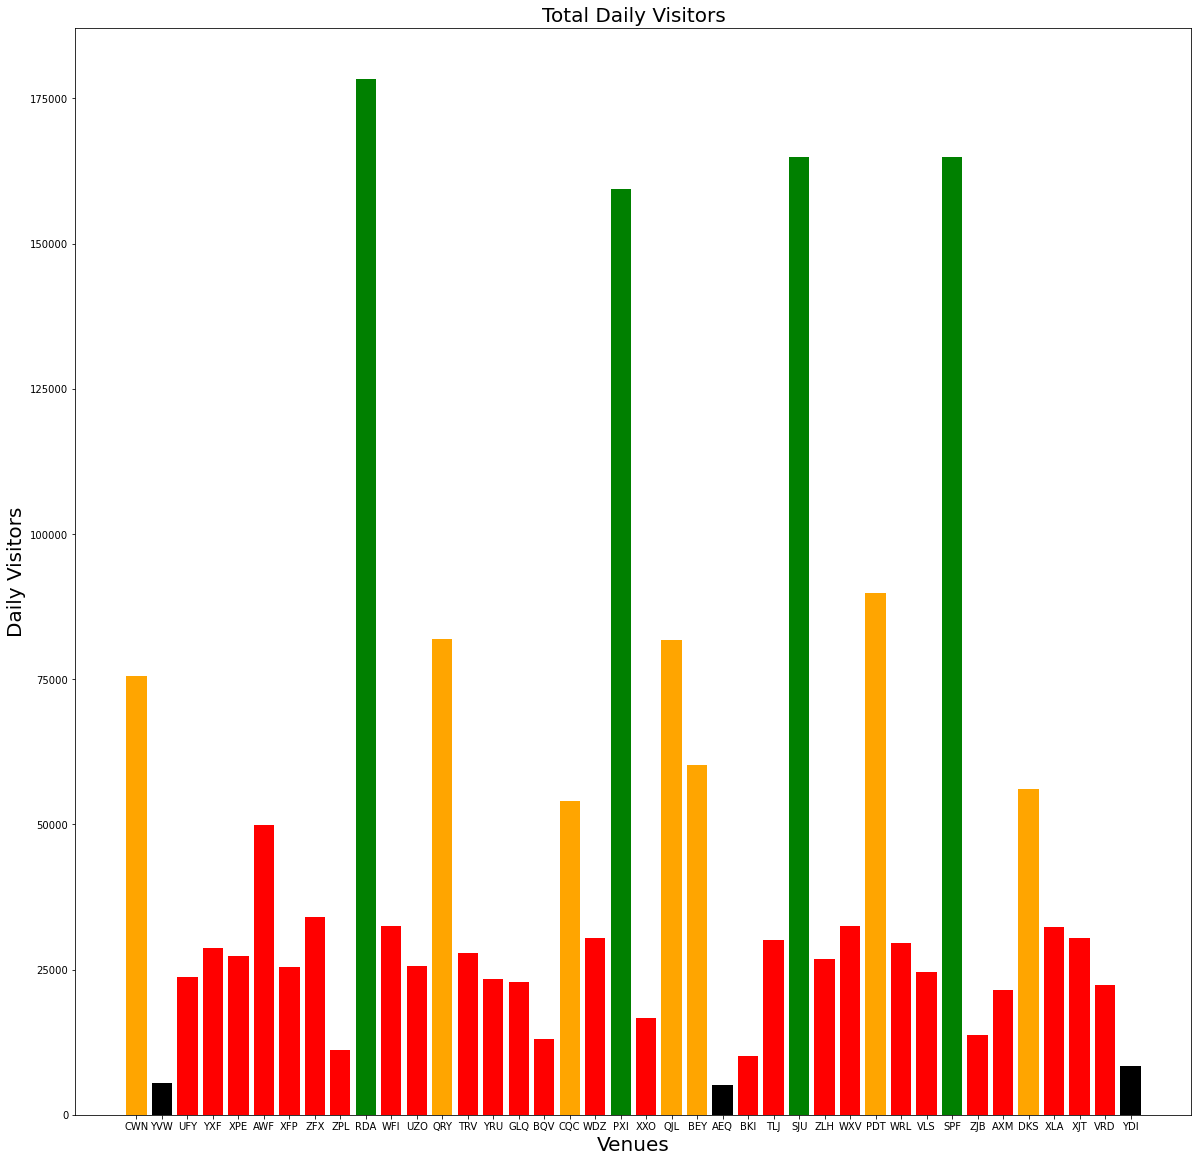

In [154]:
# Bar Chart for Daily Visitors 

colours = []
for name in DailyVisitor.columns:
    daily_visitors = DailyVisitor[name].sum()
    if daily_visitors > 100000:
        colour = 'green'
    elif daily_visitors > 50000:
        colour = 'orange'
    elif daily_visitors > 10000:
        colour = 'red'
    else:
        colour = 'black'
    colours.append(colour)

plt.figure(figsize=(20, 20))
x_pos = np.arange(len(DailyVisitor.columns))
plt.bar(x_pos, DailyVisitor.sum(), align='center', color=colours)
plt.xticks(x_pos, DailyVisitor.columns)
plt.xlabel('Venues', fontsize= 20)
plt.ylabel('Daily Visitors', fontsize= 20)
plt.title('Total Daily Visitors', fontsize=20)
plt.show()

Venue CWN is Medium volume
Venue YVW is Low volume
Venue UFY is Medium volume
Venue YXF is Medium volume
Venue XPE is Medium volume
Venue AWF is Medium volume
Venue XFP is Medium volume
Venue ZFX is Medium volume
Venue ZPL is Medium volume
Venue RDA is High volume
Venue WFI is Medium volume
Venue UZO is Medium volume
Venue QRY is Medium volume
Venue TRV is Medium volume
Venue YRU is Medium volume
Venue GLQ is Medium volume
Venue BQV is Medium volume
Venue CQC is Medium volume
Venue WDZ is Medium volume
Venue PXI is High volume
Venue XXO is Medium volume
Venue QJL is Medium volume
Venue BEY is Medium volume
Venue AEQ is Low volume
Venue BKI is Medium volume
Venue TLJ is Medium volume
Venue SJU is High volume
Venue ZLH is Medium volume
Venue WXV is Medium volume
Venue PDT is Medium volume
Venue WRL is Medium volume
Venue VLS is Medium volume
Venue SPF is High volume
Venue ZJB is Medium volume
Venue AXM is Medium volume
Venue DKS is Medium volume
Venue XLA is Medium volume
Venue XJT is Me

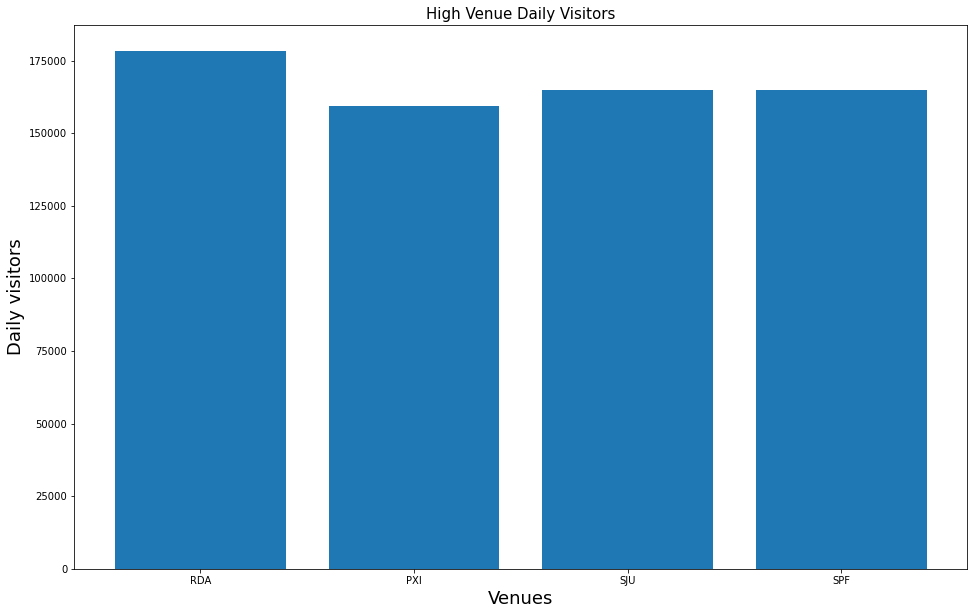

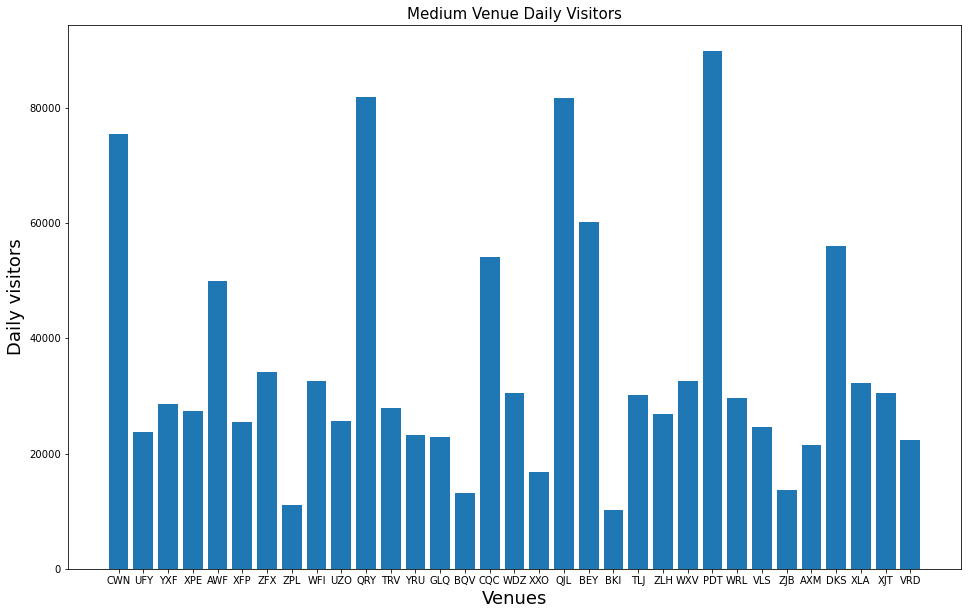

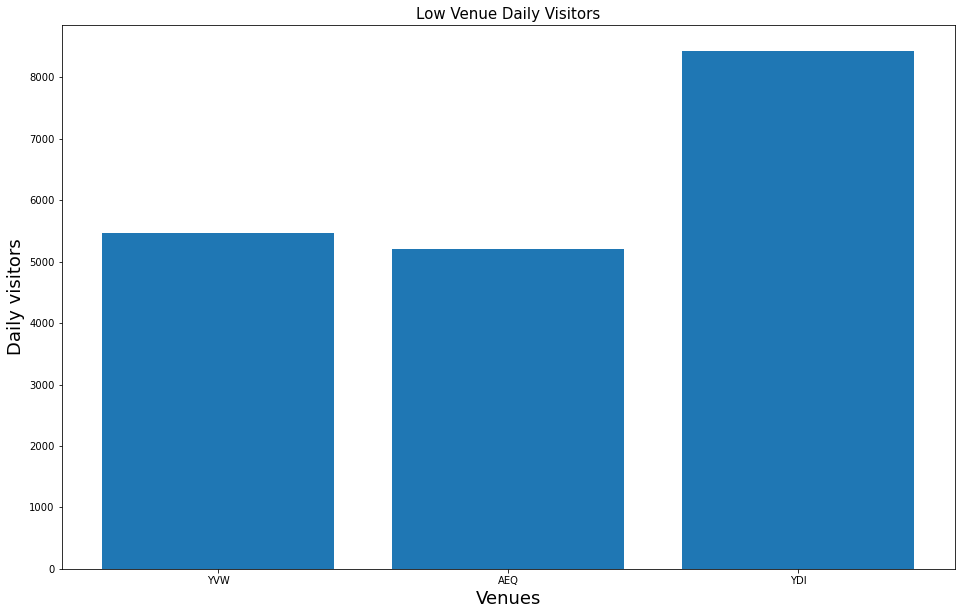

In [155]:

data = DailyVisitor.reindex(DailyVisitor.max(axis=1).sort_values().index)


categories = ['High', 'Medium', 'Low']
categories_selected = [[] for i in range(len(categories))]
for name in data.columns:
    daily_visitors = data[name].sum()
    if daily_visitors > 150000:
        category = 0
    elif daily_visitors > 10000:
        category = 1
    else:
        category = 2
    categories_selected[category].append(name)
    print('Venue ' + name + ' is ' + categories[category] + ' volume')

for i in range(len(categories)):
    print(categories[i] + ': ' + str(categories_selected[i]))

for i, selected in enumerate(categories_selected):
    plt.figure(figsize=(16, 10))
    x_pos = np.arange(len(data[selected].columns))
    plt.bar(x_pos, data[selected].sum(), align='center')
    plt.xticks(x_pos, data[selected].columns)
    plt.xlabel('Venues', fontsize=18)
    plt.ylabel('Daily visitors', fontsize=18)
    plt.title(categories[i] + ' Venue Daily Visitors', fontsize=15)
    plt.show()

In [156]:
HighSelected = ['RDA', 'PXI', 'SJU', 'SPF']
MediumSelected = ['CWN', 'UFY', 'YXF', 'XPE', 'AWF', 'XFP', 'ZFX', 'ZPL', 'WFI', 'UZO', 'QRY', 'TRV', 'YRU', 'GLQ', 'BQV', 'CQC', 'WDZ', 'XXO', 'QJL', 'BEY', 'BKI', 'TLJ', 'ZLH', 'WXV', 'PDT', 'WRL', 'VLS', 'ZJB', 'AXM', 'DKS', 'XLA', 'XJT', 'VRD']
LowSelected = ['YVW', 'AEQ', 'YDI']

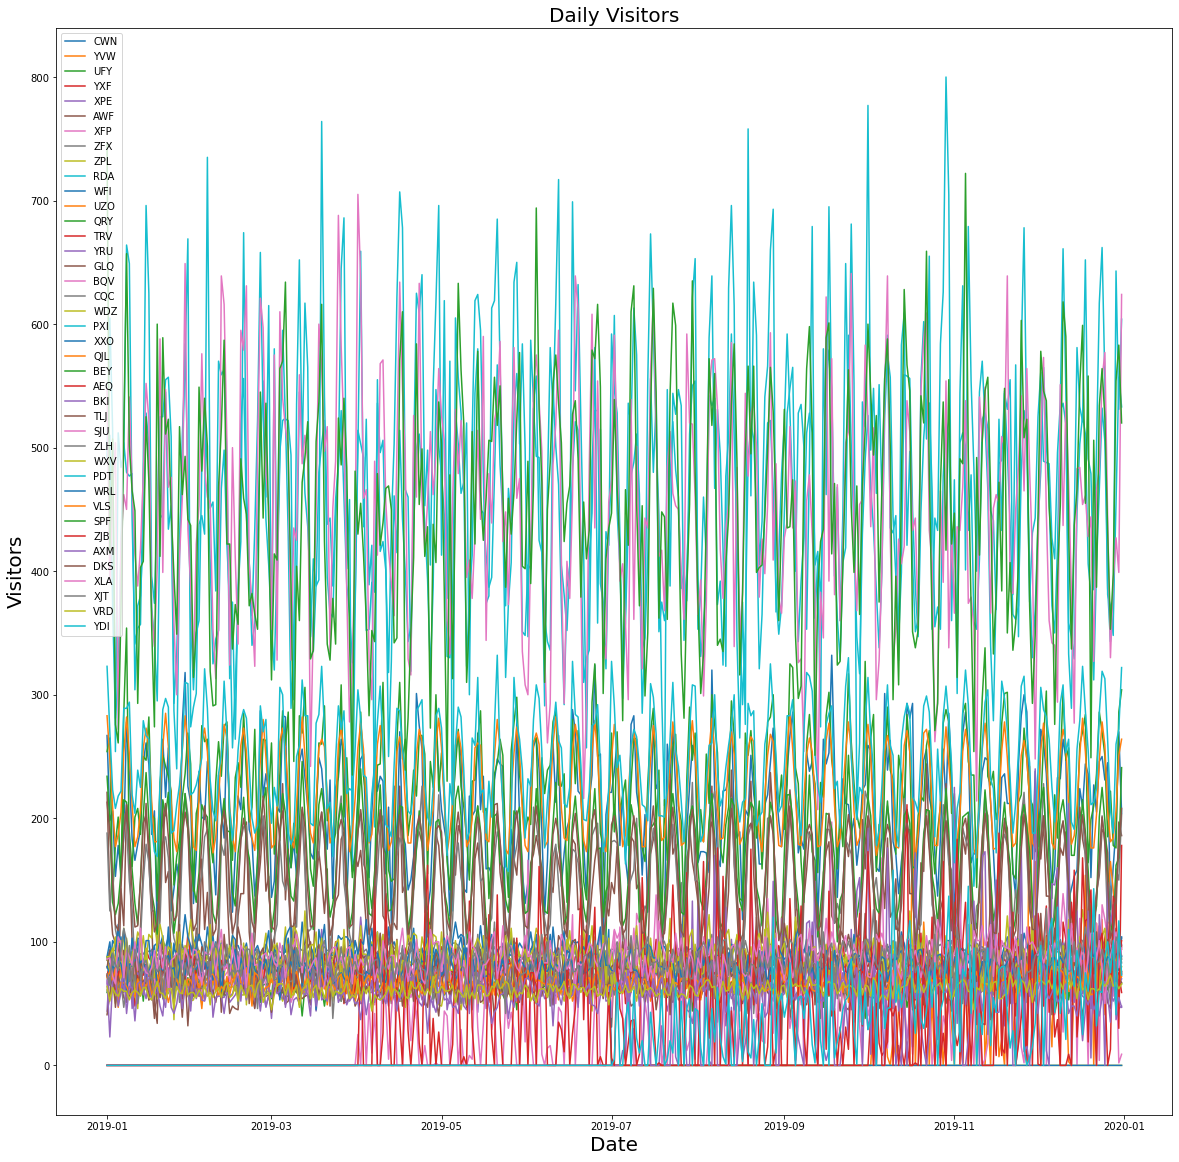

In [157]:
#sample_rate = 'W'
#average_data = VDailyVframe.resample(sample_rate).mean()
plt.figure(figsize=(20,20))
plt.plot(DailyVisitor)
plt.title('Daily Visitors', fontsize=20)
plt.legend(DailyVisitor.columns, loc=2)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Visitors', fontsize=20)
plt.show()

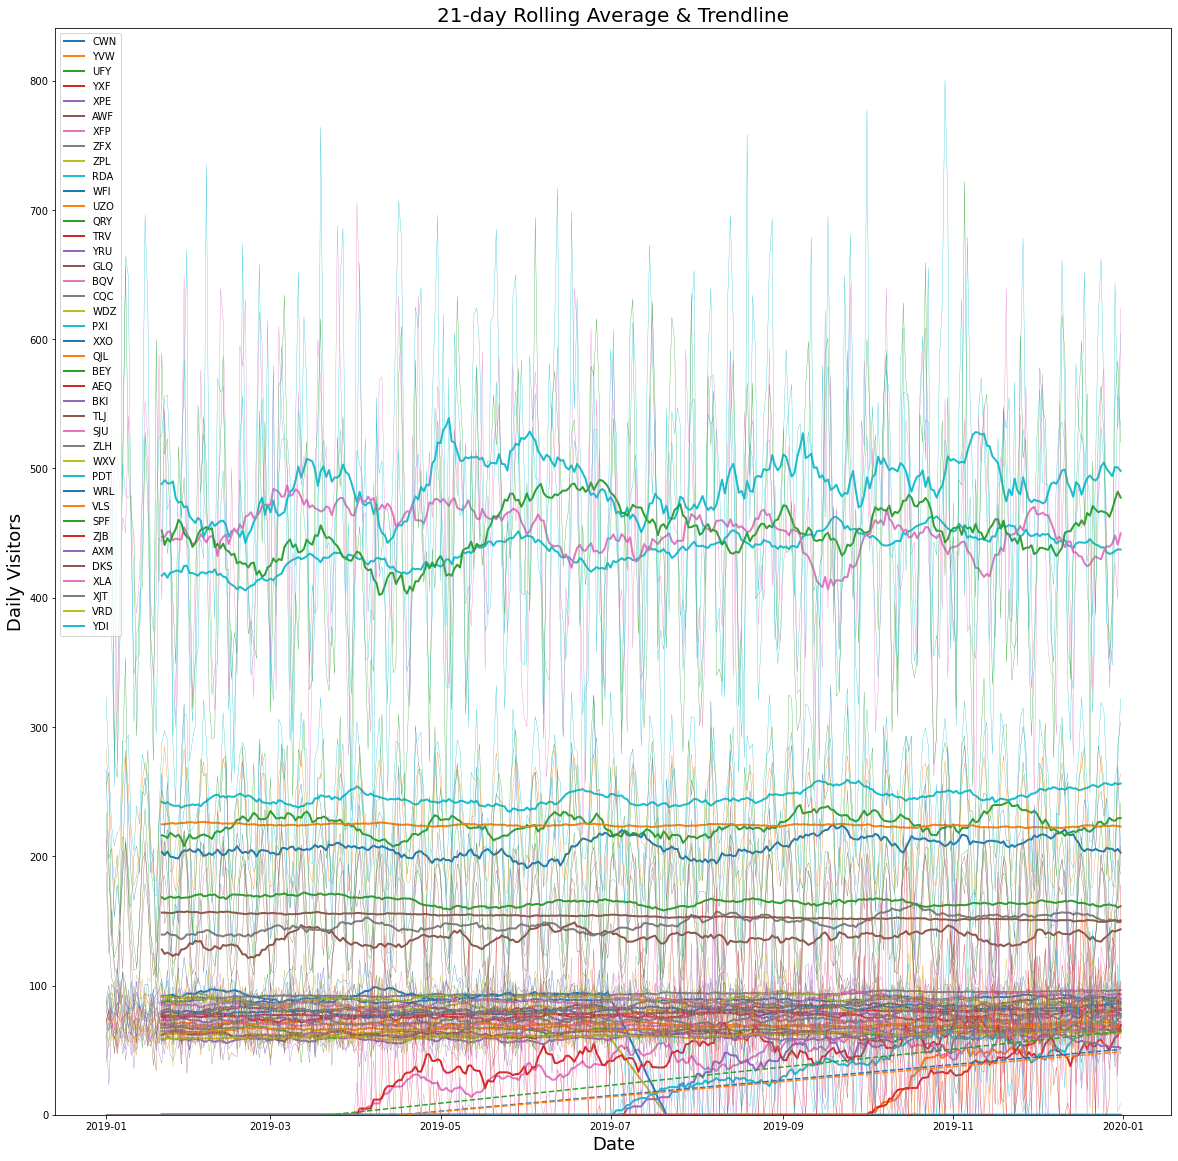

In [158]:
# just for understanding, how data series fluated during on time with noise data.
period = 21
rolling_average = DailyVisitor.rolling(window=period).mean()
plt.figure(figsize=(20, 20))
plt.plot(rolling_average[DailyVisitor.columns], linewidth=2)
plt.gca().set_prop_cycle(None)
plt.plot(DailyVisitor[DailyVisitor.columns], linewidth=0.3)
plt.gca().set_prop_cycle(None)
for name in selected:
    x = np.arange(len(DailyVisitor[name]))
    z = np.polyfit(x, DailyVisitor[name], 1)
    trend = np.poly1d(z)
    plt.plot(DailyVisitor.index, trend(x), linestyle='--')
plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Daily Visitors', fontsize=18)
plt.title('21-day Rolling Average & Trendline', fontsize=20)
plt.legend(DailyVisitor.columns, loc=2)
plt.show()

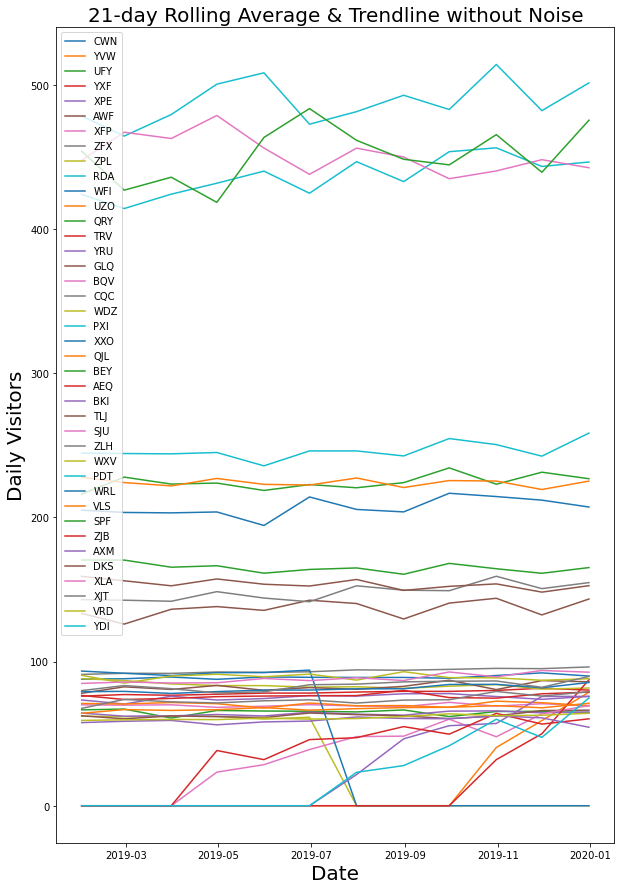

In [159]:
# on this part, I display monthly time tseries for venues which are closed and open during time periods because, I can decided
# easily seen this clear trend ling using rolling function.


sample_rate = 'M'
average_data = DailyVisitor.resample(sample_rate).mean()
plt.figure(figsize=(10,15))
plt.plot(average_data)
plt.title('21-day Rolling Average & Trendline without Noise', fontsize=20)
plt.legend(DailyVisitor.columns, loc=2)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Daily Visitors', fontsize=20)
plt.show()

In [160]:
time_title = '## Time-Series'
volumes = ['High', 'Medium', 'Low']
select = []

pn.extension()

def linegraph(volume, window_size, date_range):
    if volume == 'High':
        select = HighSelected
    elif volume == 'Medium':
        select = MediumSelected
    else:
        select = LowSelected
    frame = DailyVisitor[select] # restrict to selected products
    frame = frame.rolling(window=window_size).mean() # calculate rolling average
    frame = frame.loc[pd.to_datetime(date_range[0]) : pd.to_datetime(date_range[1])] # restrict to date range
    return frame.hvplot.line(frame_width=600, grid=True)

def update_time_row(event):
    time_row[1].object = linegraph(volume.value, day_avg.value, time_date_range.value)

    
volume = pn.widgets.Select(name='Volume', options=volumes, width=200)
day_avg = pn.widgets.IntSlider(name='Day average', value=7, start=1, end=21, width=200)
time_date_range = pn.widgets.DateRangeSlider(name='Dates', width=200,
                                        value=(DailyVisitor.index[0], DailyVisitor.index[-1]),
                                        start=DailyVisitor.index[0], end=DailyVisitor.index[-1])

time_row = pn.Row(
    pn.Column(time_title, volume, day_avg, time_date_range),
    linegraph(volume.value, day_avg.value, time_date_range.value)
)

volume.param.watch(update_time_row, 'value')
day_avg.param.watch(update_time_row, 'value')
time_date_range.param.watch(update_time_row, 'value')

time_row.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='Volume', options=['High', 'Medium', 'Low'], value='High', width=200)
        [2] IntSlider(end=21, name='Day average', start=1, value=7, width=200)
        [3] DateRangeSlider(end=Timestamp('2019-12-31 0..., name='Dates', start=Timestamp('2019-01-01 0..., value=(Timestamp('2019-01-01 00:..., value_end=Timestamp('2019-12-31 0..., value_start=Timestamp('2019-01-01 0..., width=200)
    [1] HoloViews(NdOverlay)

In [161]:
def get_correlation_plots(venue_x, venue_y, date_range):
    df = DailyVisitor.loc[pd.to_datetime(date_range[0]) : pd.to_datetime(date_range[1])] # restrict to date range
    return df.hvplot.scatter(frame_height=250, frame_width=250,
                             x=venue_x, y=venue_y,
                             title=venue_x + ' vs ' + venue_y,
                             size=10, padding=0.1) +\
           df.corr().hvplot.heatmap(frame_height=250, frame_width=300,
                                    title='Venues Correlations',
                                    rot=90, cmap='coolwarm'
                                   ).opts(invert_yaxis=True, clim=(-1, 1))


correlation_title = '### Correlations'

venue_x = pn.widgets.Select(name='x-axis', options=list(DailyVisitor.columns), width=200)
venue_y = pn.widgets.Select(name='y-axis', options=list(DailyVisitor.columns), width=200)
corr_date_range = pn.widgets.DateRangeSlider(name='Dates',
                                        value=(DailyVisitor.index[0], DailyVisitor.index[-1]),
                                        start=DailyVisitor.index[0], end=DailyVisitor.index[-1],
                                        width=200)

correlation_row = pn.Row(
    pn.Column(correlation_title, venue_x, venue_y, corr_date_range),
    get_correlation_plots(venue_x.value, venue_y.value, corr_date_range.value)
)

def update_correlation_row(event):
    correlation_row[1].object = get_correlation_plots(venue_x.value, venue_y.value, corr_date_range.value)

product_x.param.watch(update_correlation_row, 'value')
product_y.param.watch(update_correlation_row, 'value')
corr_date_range.param.watch(update_correlation_row, 'value')

correlation_row.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='x-axis', options=['CWN', 'YVW', ...], value='CWN', width=200)
        [2] Select(name='y-axis', options=['CWN', 'YVW', ...], value='CWN', width=200)
        [3] DateRangeSlider(end=Timestamp('2019-12-31 0..., name='Dates', start=Timestamp('2019-01-01 0..., value=(Timestamp('2019-01-01 00:..., value_end=Timestamp('2019-12-31 0..., value_start=Timestamp('2019-01-01 0..., width=200)
    [1] HoloViews(Layout)

In [162]:
#interactive histogram with bins

x_min = 200
x_max = 700
bin_width = 10
n_bins = int((bin_width + x_max - x_min) / bin_width)
print(str(n_bins) + ' bins')
bins = [(x_min + x * (bin_width + x_max - x_min) / n_bins) for x in range(int(n_bins))]

plot = DailyVisitor[HighSelected].hvplot.hist(
    frame_height=500, frame_width=500,
    xlabel='Customer Per Day', ylabel='Frequency of customer',
    title='High Volume Customers in Store',
    alpha=0.5, muted_alpha=0, muted_fill_alpha=0, muted_line_alpha=0,
    tools=['pan', 'box_zoom', 'wheel_zoom', 'undo', 'redo', 'hover', 'save', 'reset'],
    bins=bins
)
hvplot.show(plot)

51 bins
Launching server at http://localhost:63301


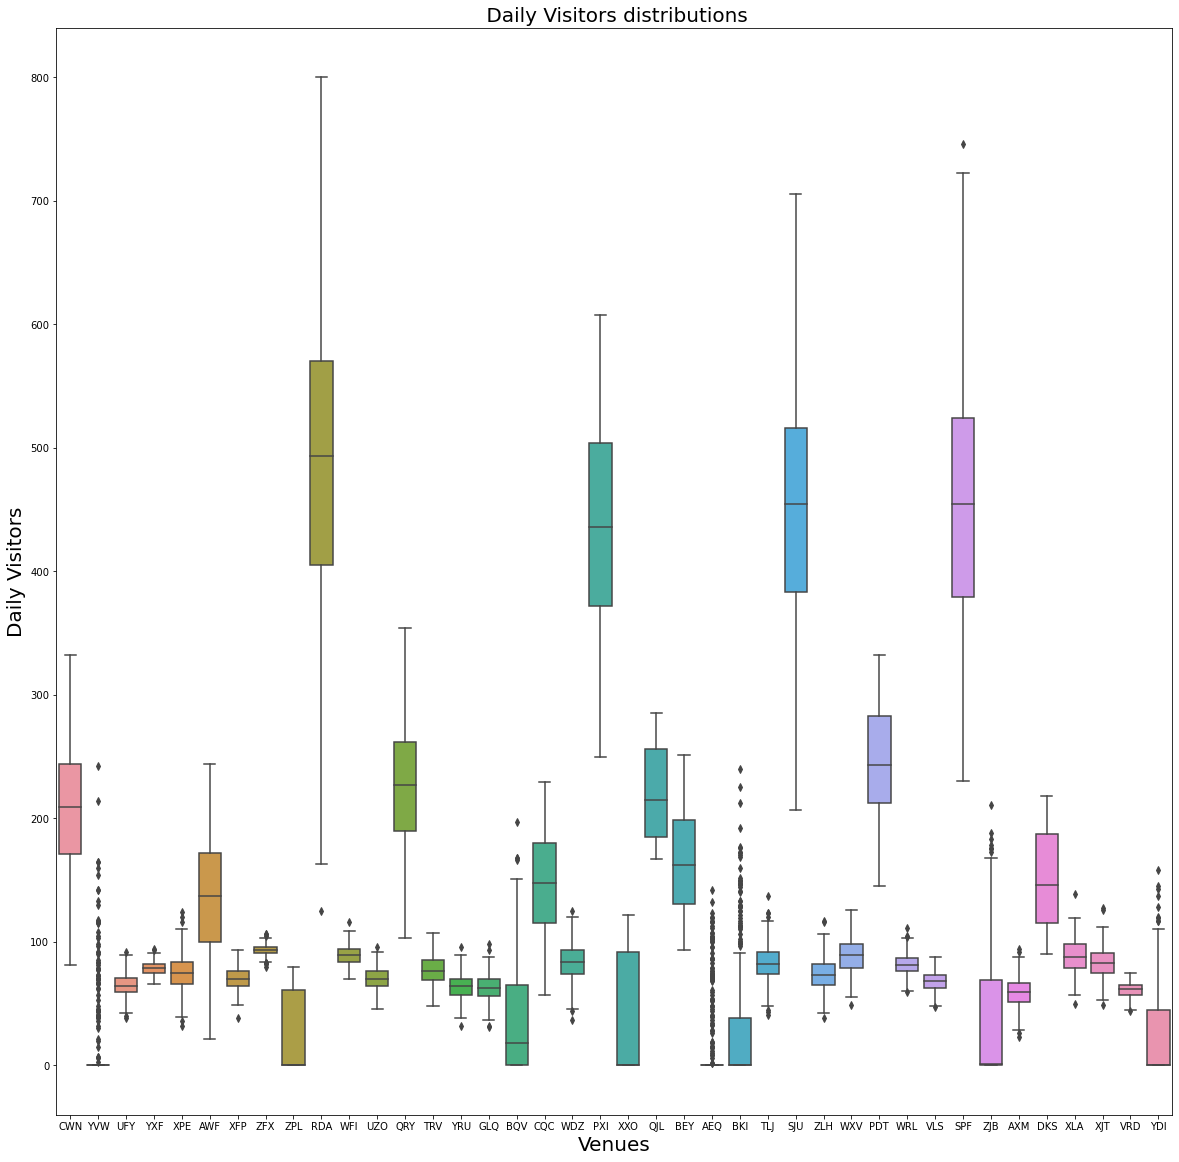

In [163]:

plt.figure(figsize=(20, 20))
# data[selected].boxplot()
sns.boxplot(data = DailyVisitor)
plt.xlabel('Venues', fontsize=20)
plt.ylabel('Daily Visitors', fontsize=20)
plt.title(' Daily Visitors distributions', fontsize=20)
plt.show()


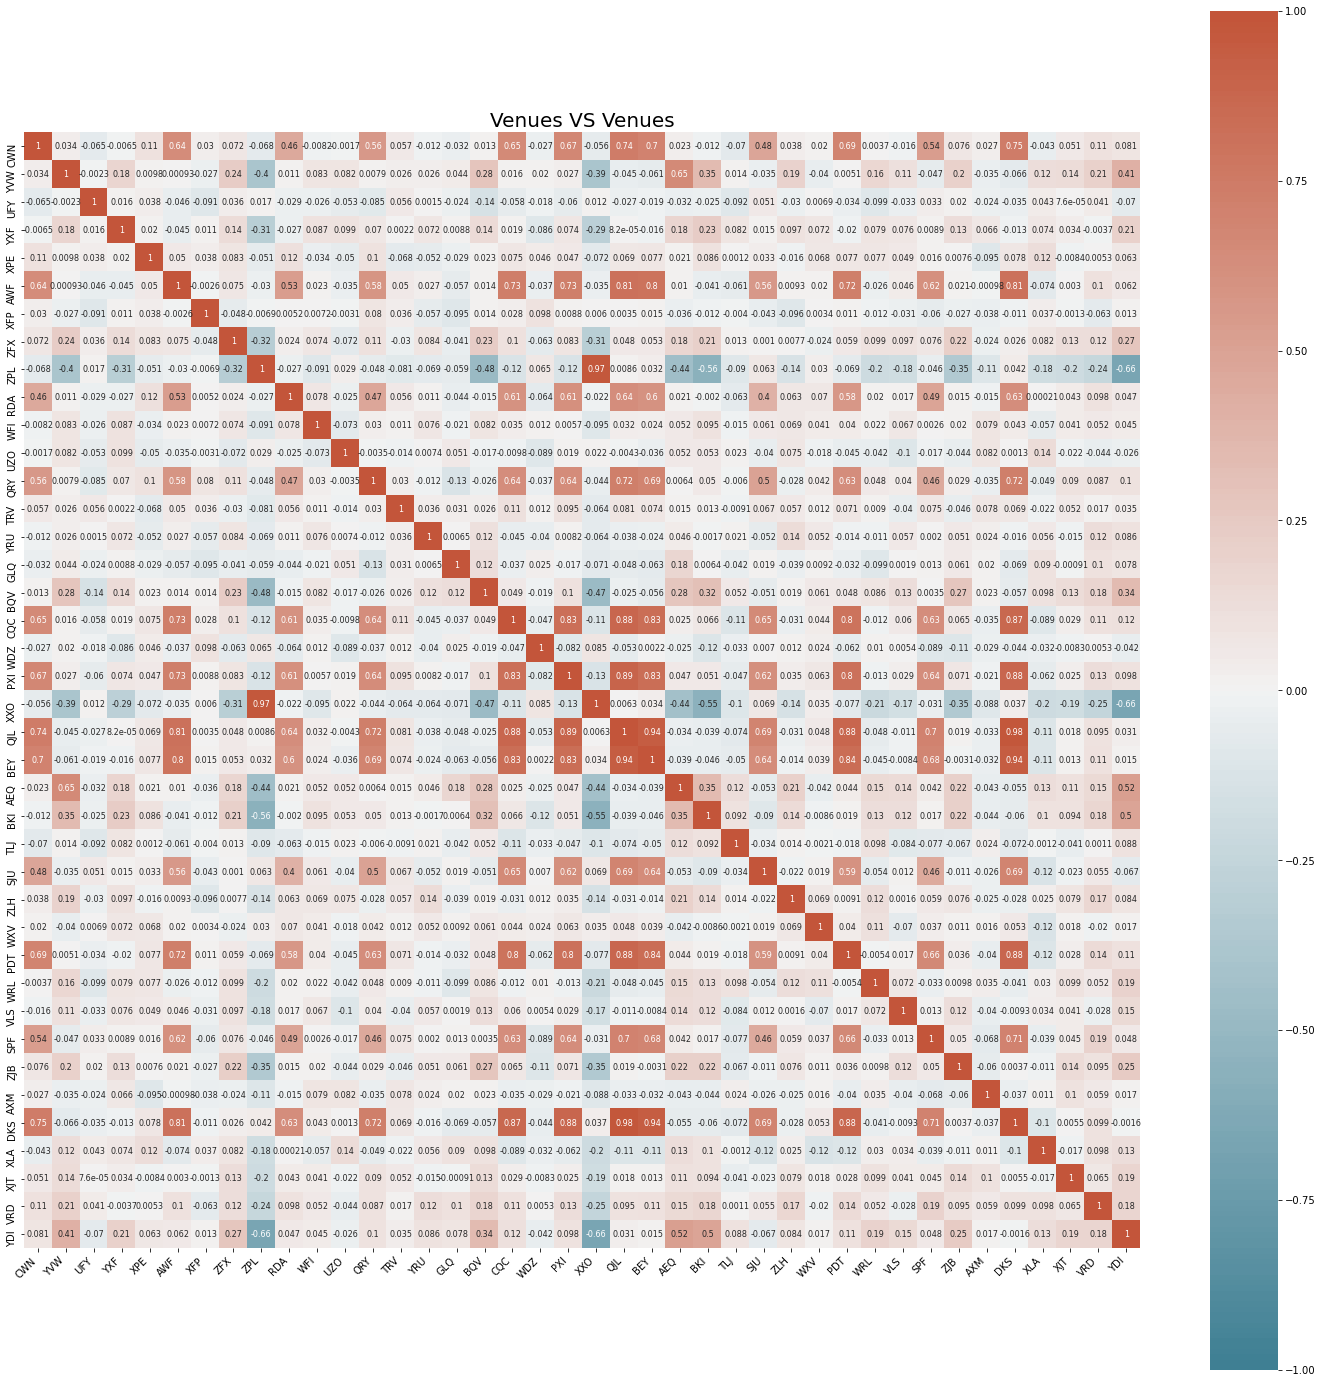

In [164]:
# just for understanding
plt.figure(figsize=(25, 25))
correct = DailyVisitor[DailyVisitor.columns].corr()
cocorre = sns.heatmap(correct, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
cocorre.set_xticklabels(cocorre.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Venues VS Venues', fontsize=20)
plt.show()

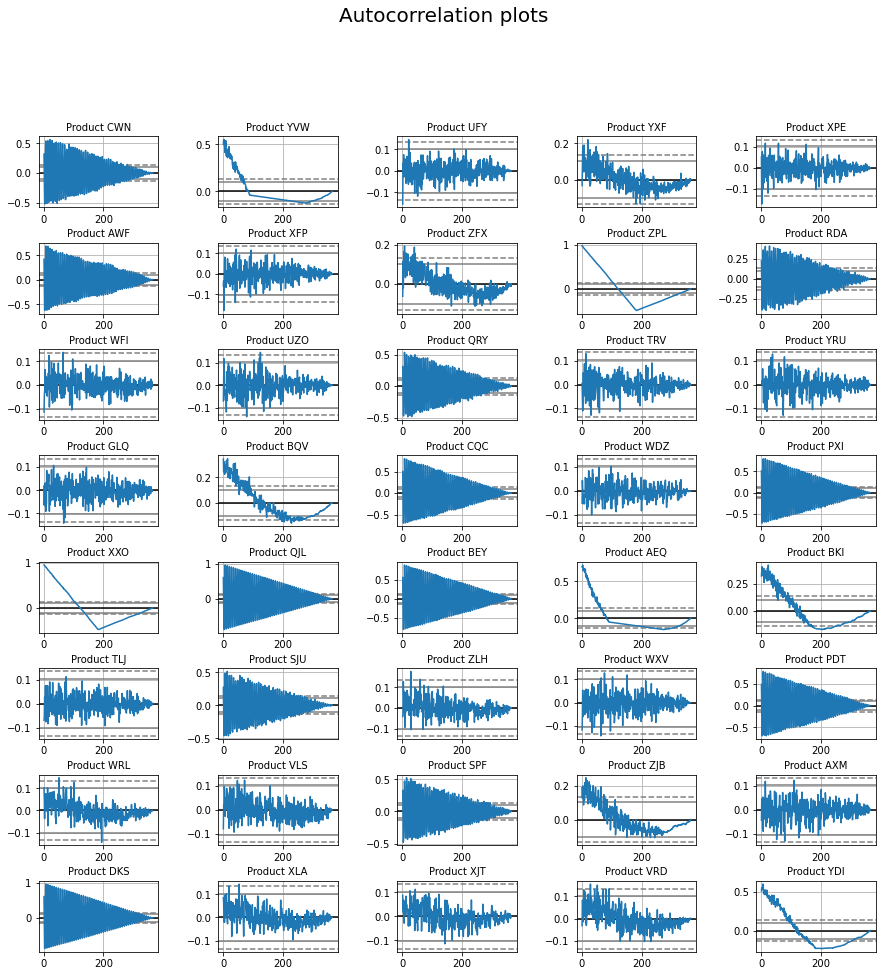

In [165]:
# whole series auto correlation
row = 0
col = 0
fig, axes = plt.subplots(figsize=(15, 15), nrows=8, ncols=5)
fig.suptitle('Autocorrelation plots', fontsize=20, position=(0.5, 1.0))
for name in DailyVisitor.columns:
    sub = pd.plotting.autocorrelation_plot(DailyVisitor[name], axes[row, col])
    sub.set_title('Product ' + name, fontsize=10)
    sub.xaxis.label.set_visible(False)
    sub.yaxis.label.set_visible(False)
    col += 1
    if col == 5:
        row += 1
        col = 0
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

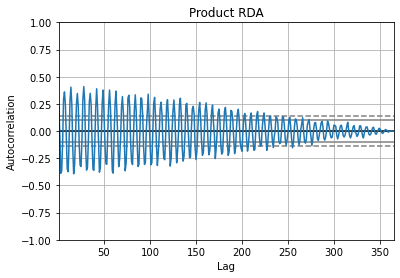

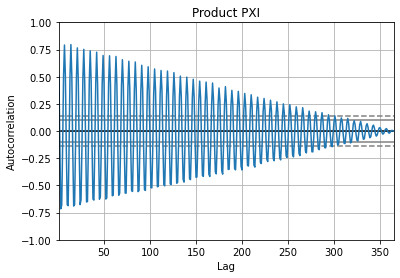

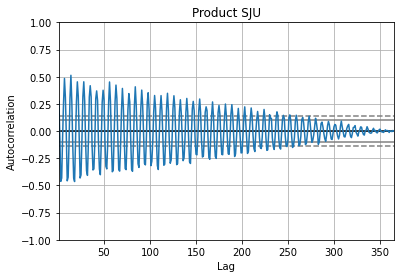

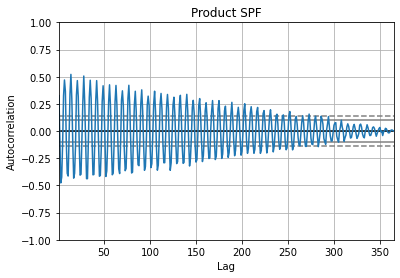

In [166]:
# high volume data
for name in DailyVisitor[HighSelected]:
    pd.plotting.autocorrelation_plot(DailyVisitor[name])
    # plt.xlim([0, 50]) # uncomment this line to zoom in
    plt.title('Product ' + name)
    plt.show()

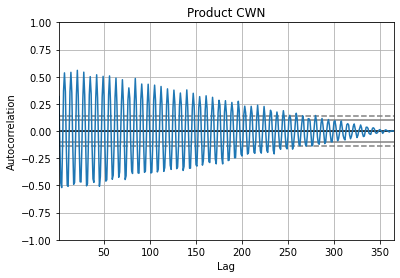

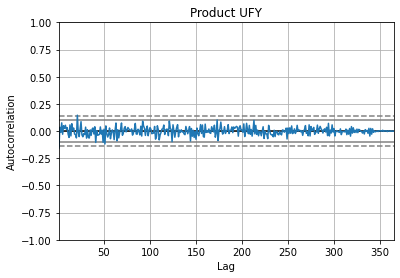

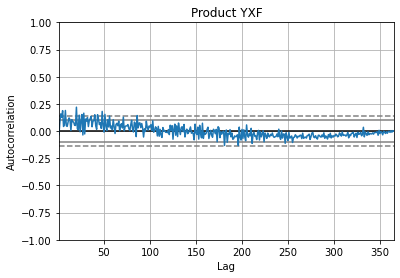

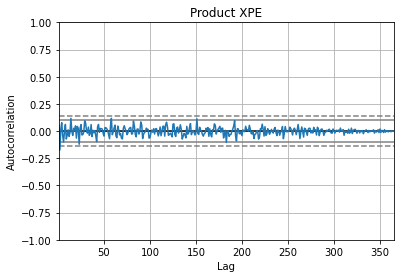

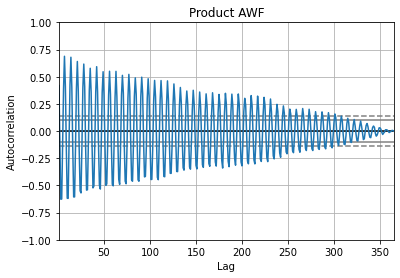

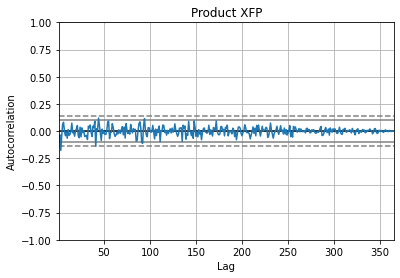

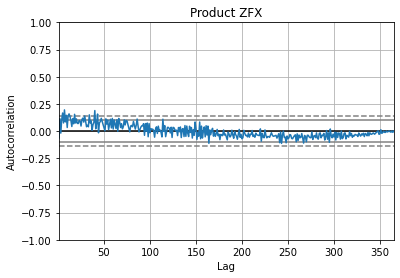

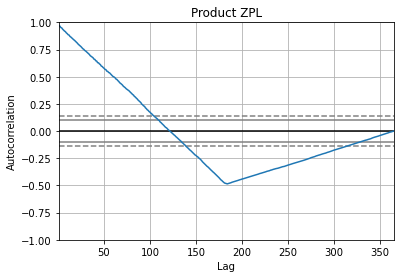

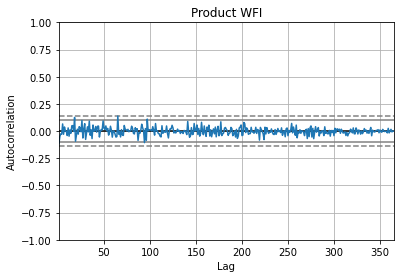

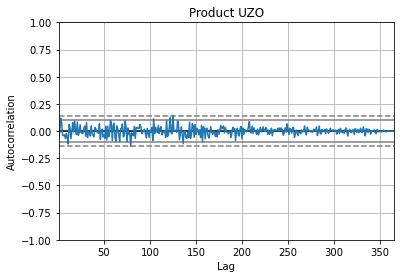

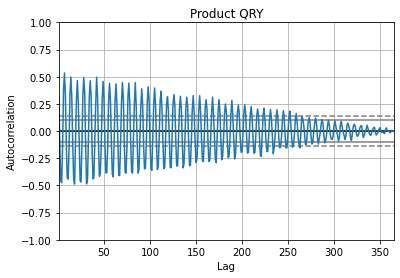

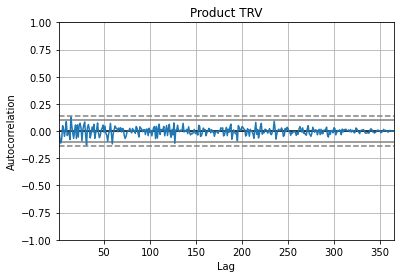

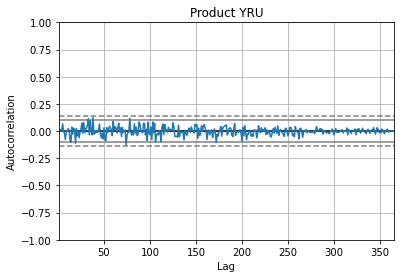

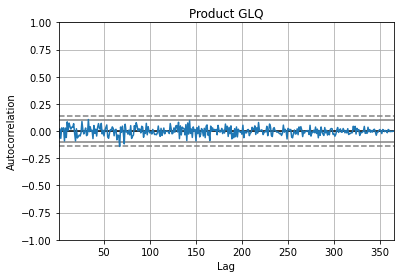

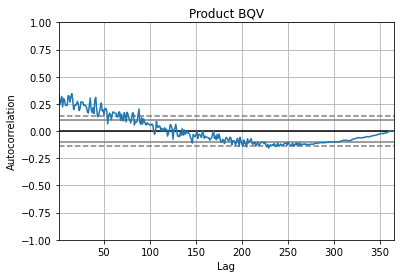

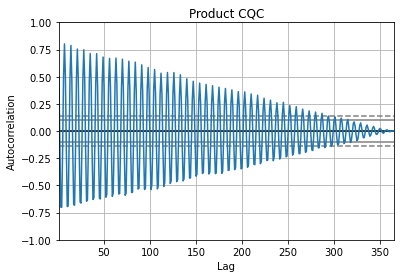

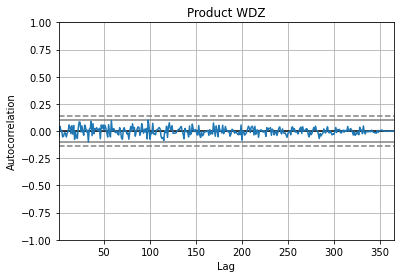

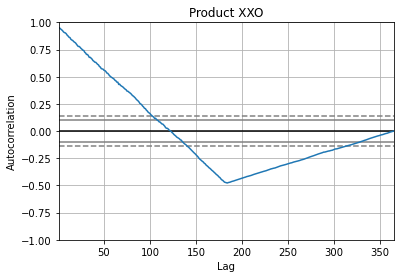

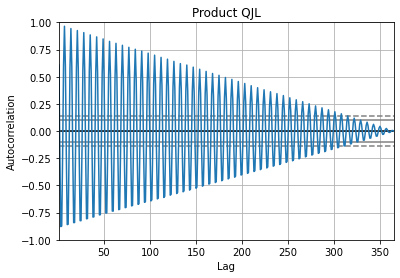

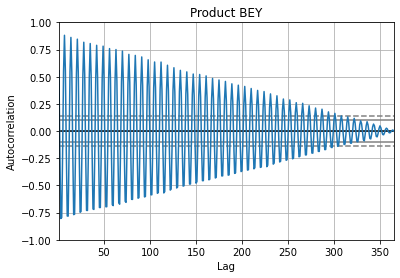

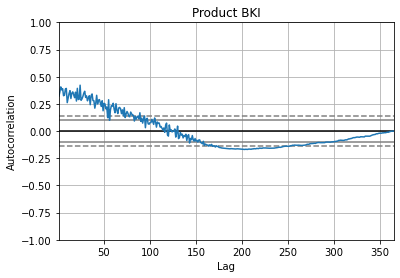

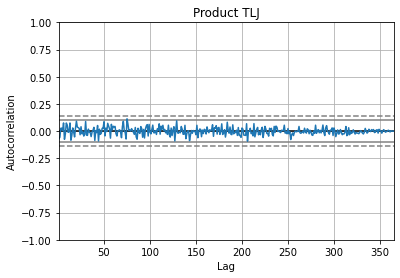

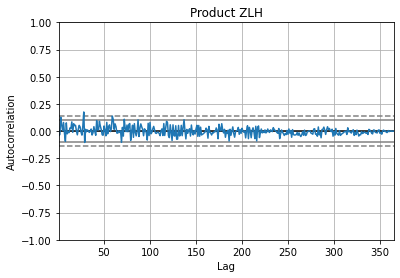

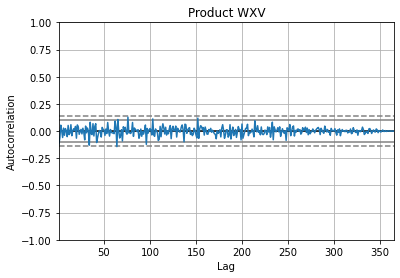

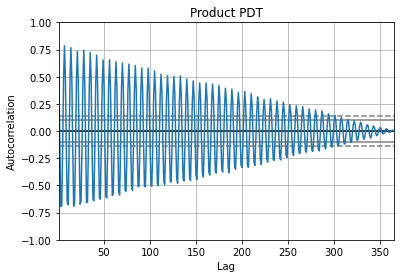

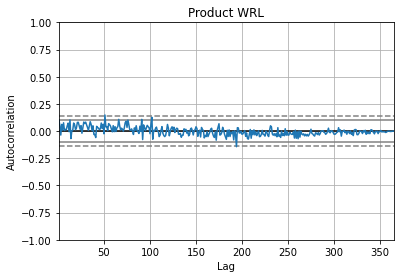

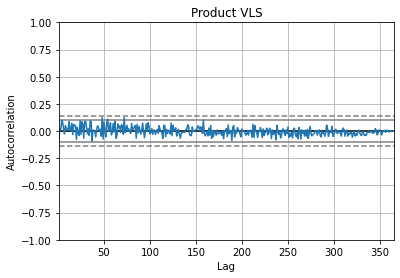

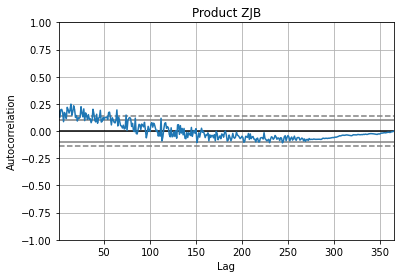

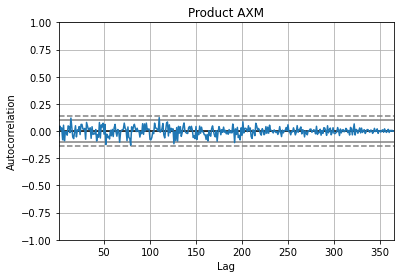

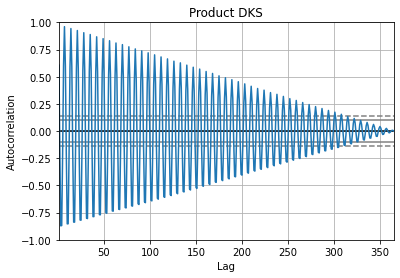

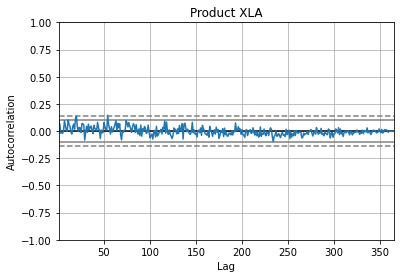

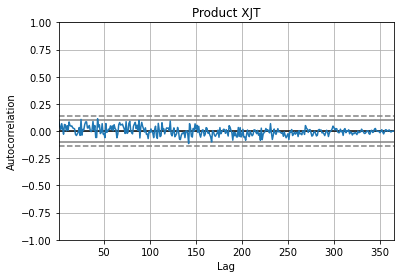

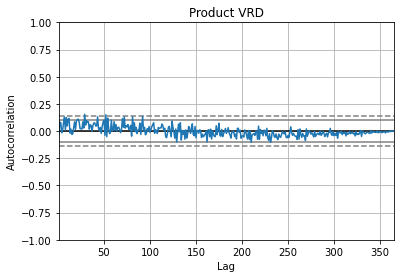

In [167]:
# medium volume data
for name in DailyVisitor[MediumSelected]:
    pd.plotting.autocorrelation_plot(DailyVisitor[name])
    # plt.xlim([0, 50]) # uncomment this line to zoom in
    plt.title('Product ' + name)
    plt.show()

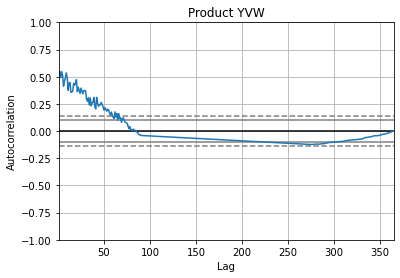

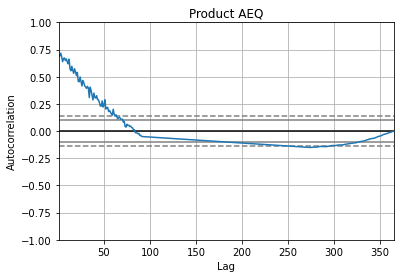

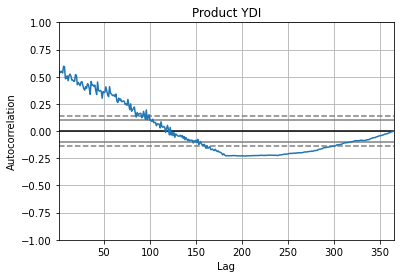

In [168]:
# Low volume data
for name in DailyVisitor[LowSelected]:
    pd.plotting.autocorrelation_plot(DailyVisitor[name])
    # plt.xlim([0, 50]) # uncomment this line to zoom in
    plt.title('Product ' + name)
    plt.show()

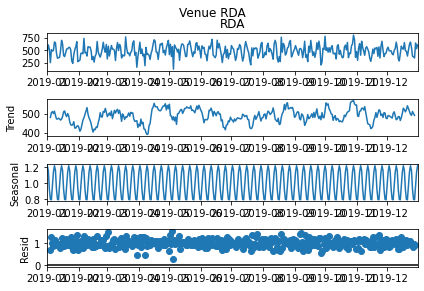

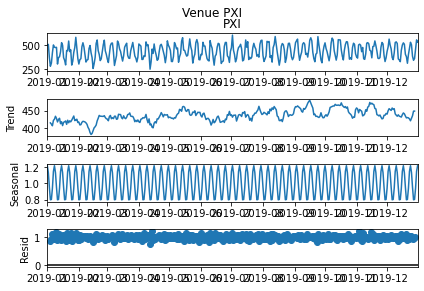

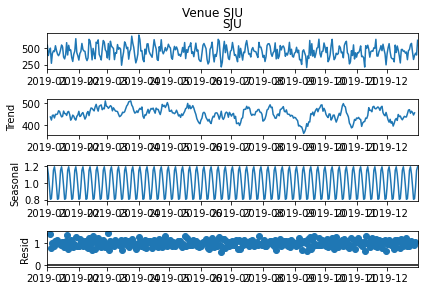

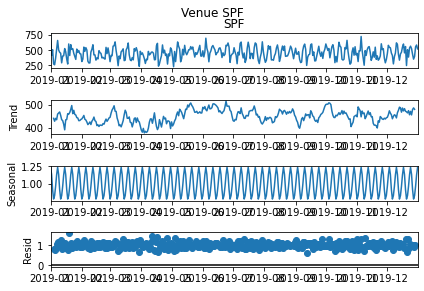

In [169]:
# high volume data
for name in HighSelected:
    result = seasonal_decompose(DailyVisitor[name], model='multiplicative', period=7)
    result.plot()
    plt.suptitle('Venue ' + name, position=(0.5, 1.0))
    plt.show()

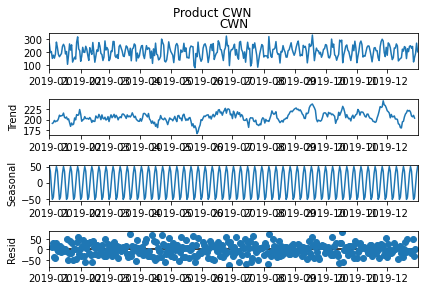

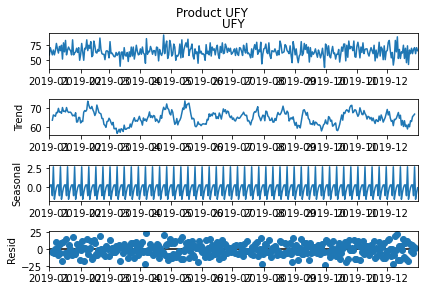

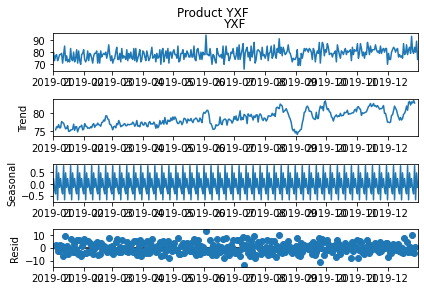

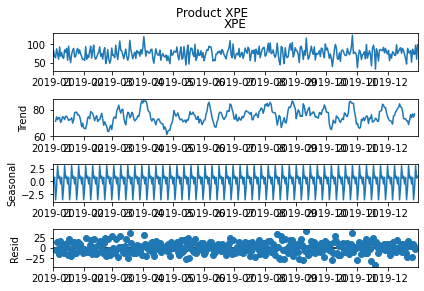

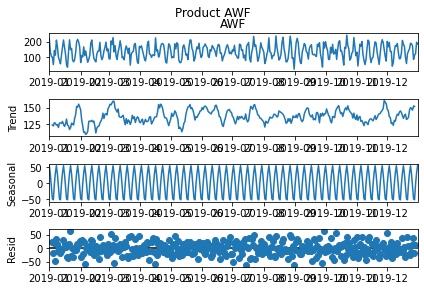

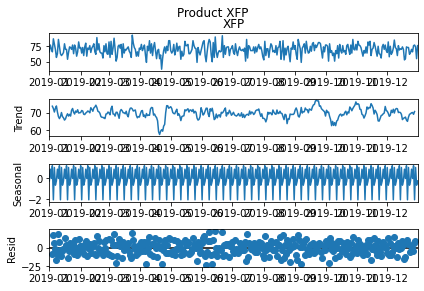

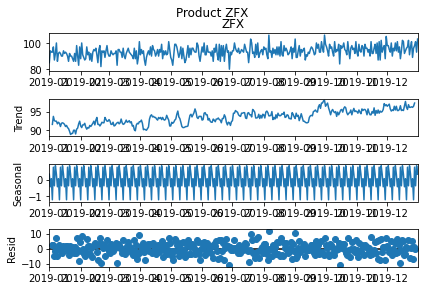

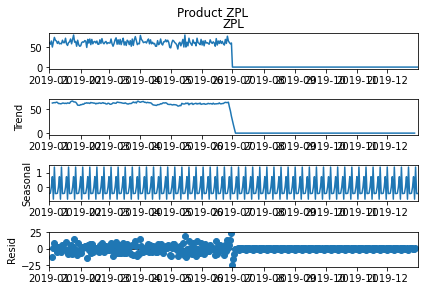

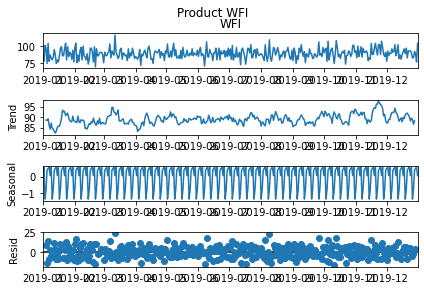

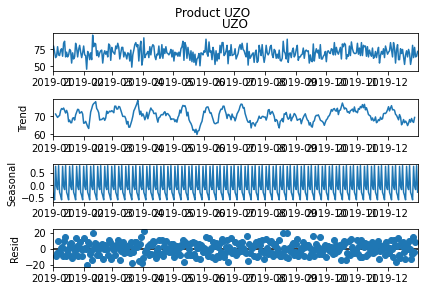

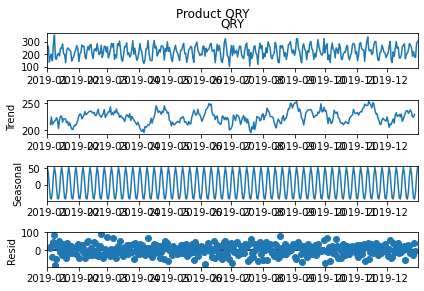

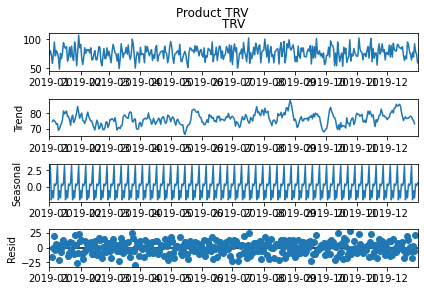

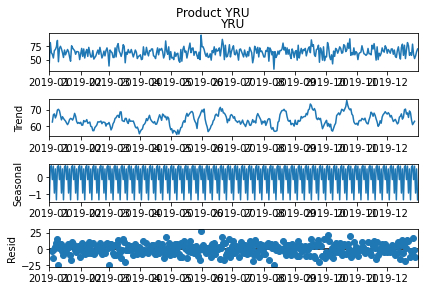

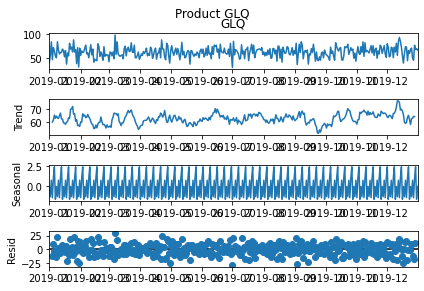

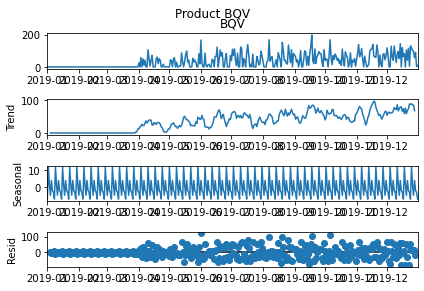

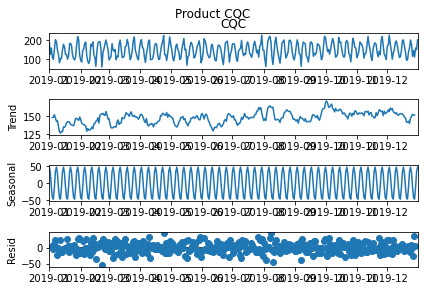

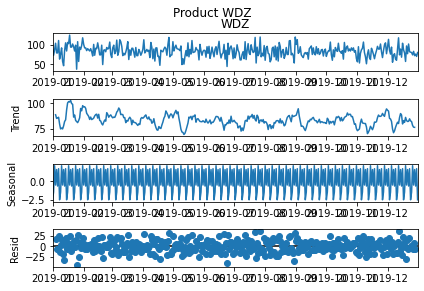

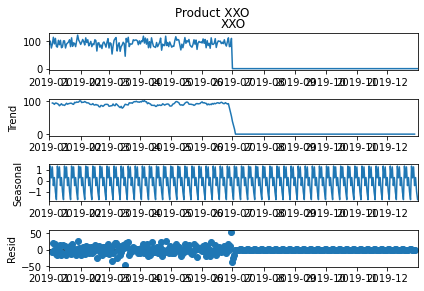

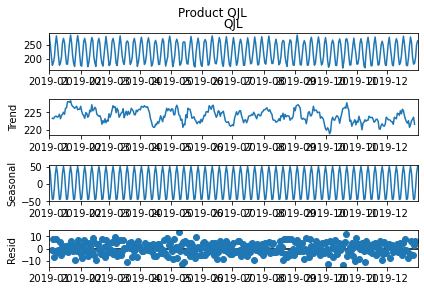

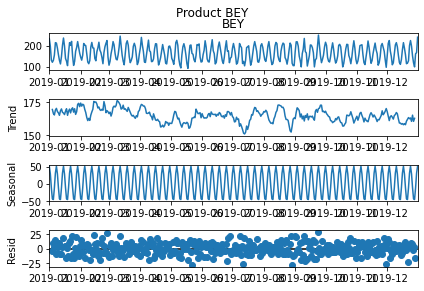

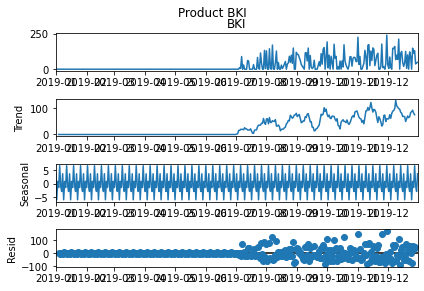

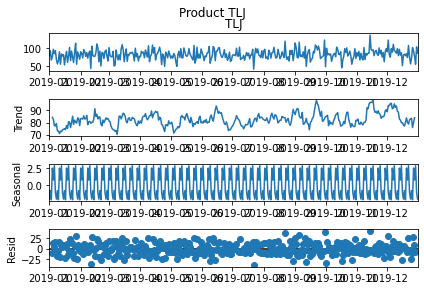

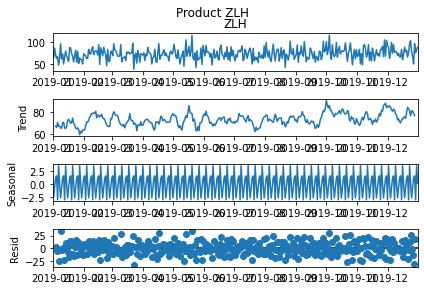

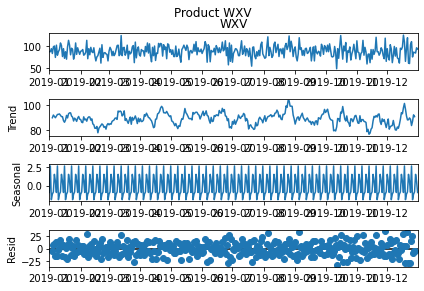

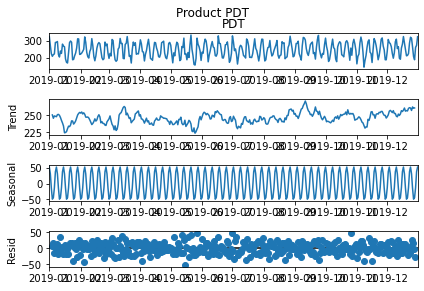

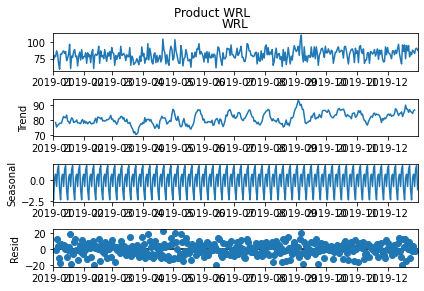

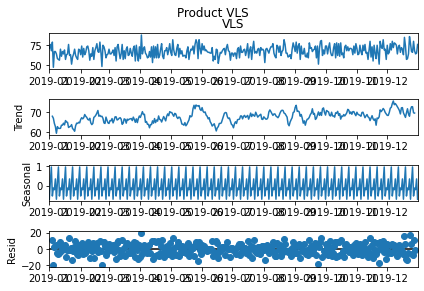

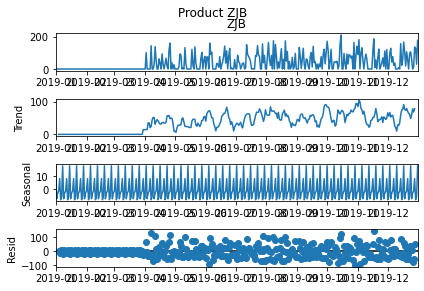

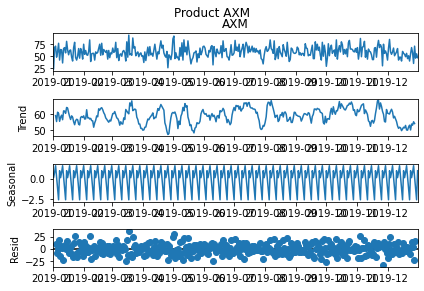

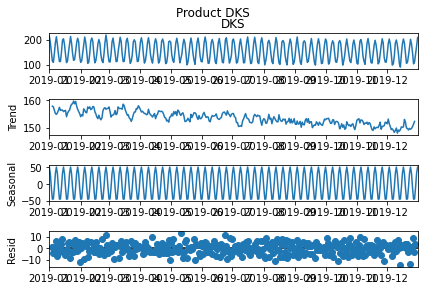

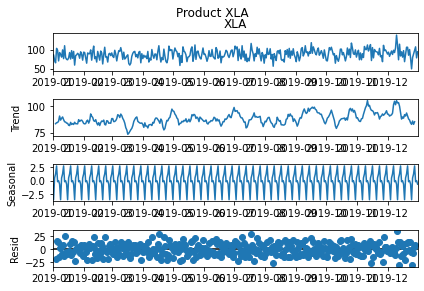

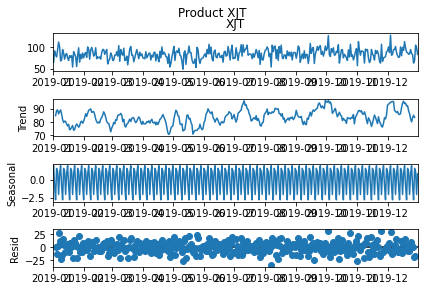

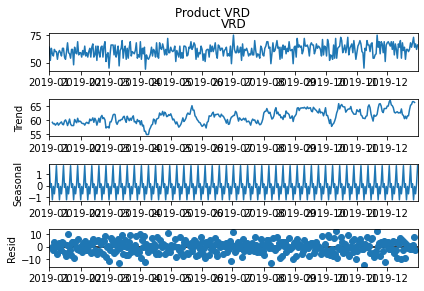

In [170]:
# medium volume data
for name in MediumSelected:
    result = seasonal_decompose(DailyVisitor[name], period=7)
    result.plot()
    plt.suptitle('Product ' + name, position=(0.5, 1.0))
    plt.show()

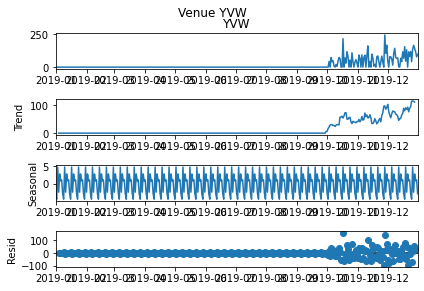

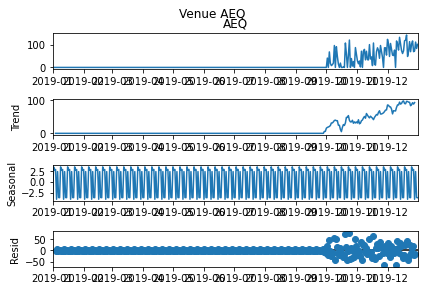

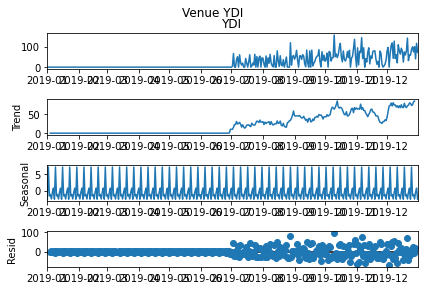

In [171]:
# low volume data
for name in LowSelected:
    result = seasonal_decompose(DailyVisitor[name], period=7)
    result.plot()
    plt.suptitle('Venue ' + name, position=(0.5, 1.0))
    plt.show()

# Summary Data 

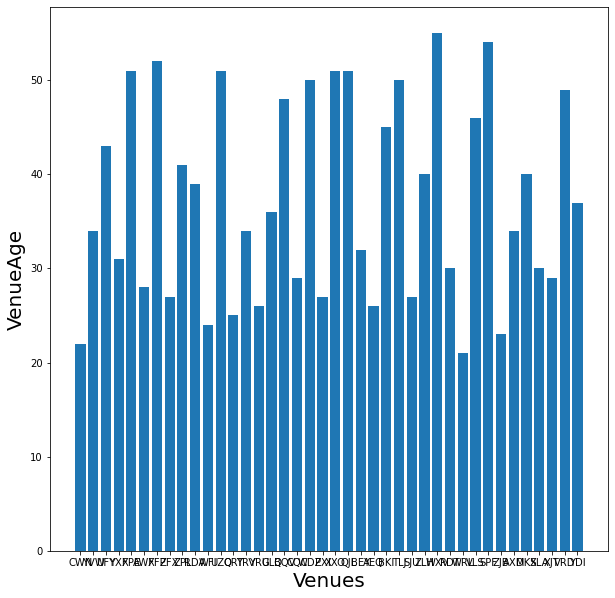

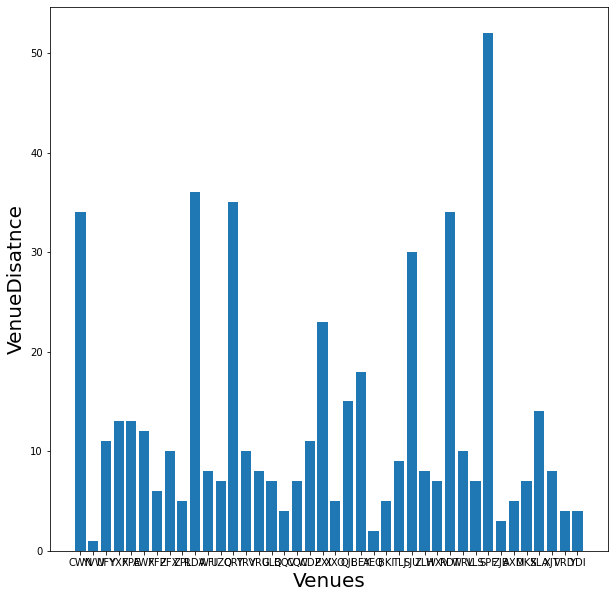

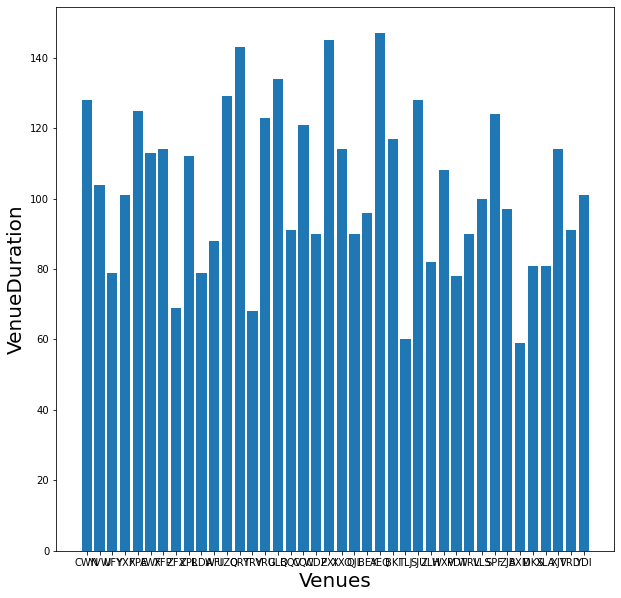

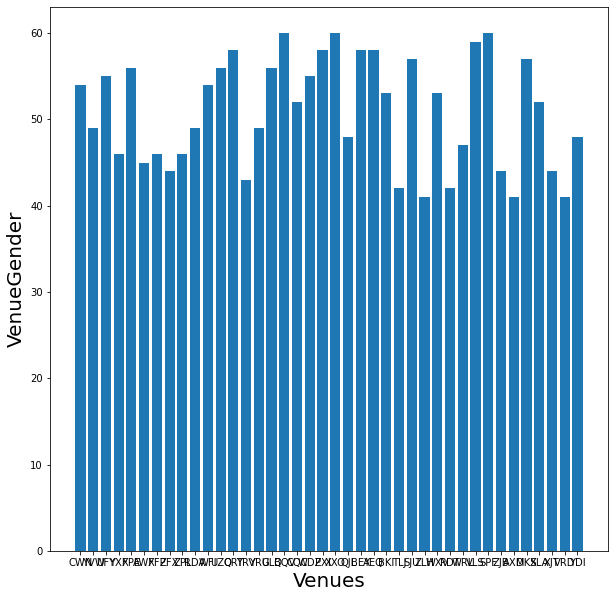

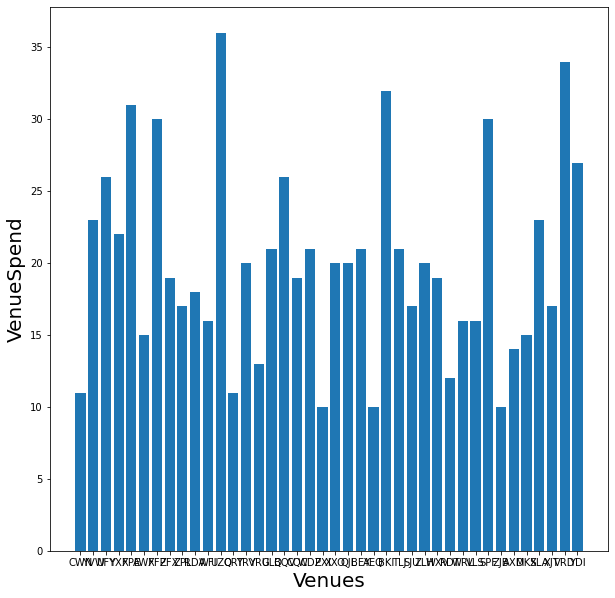

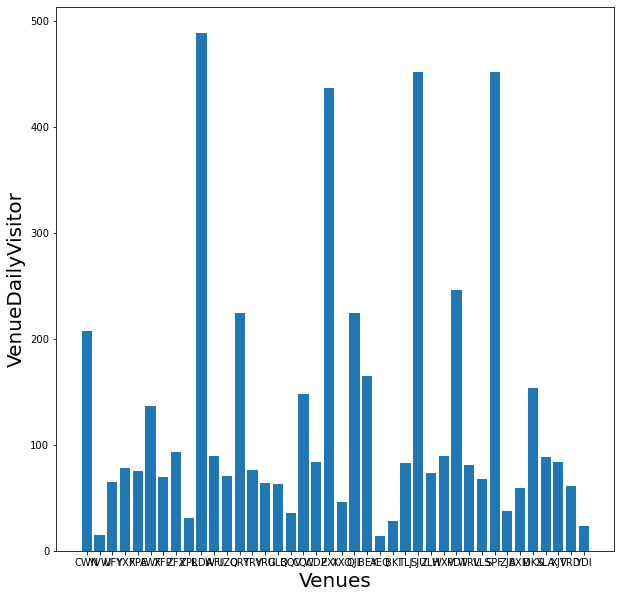

In [172]:
for i in combined_data:
    plt.figure(figsize=(10,10))
    x_pos= np.arange(len(combined_data.index))
    plt.bar(x_pos,combined_data[i],align = 'center')
    plt.xticks(x_pos, combined_data.index)
    plt.xlabel('Venues', fontsize=20)
    plt.ylabel(i, fontsize=20)
    plt.show()

     VenueAge  VenueDisatnce  VenueDuration  VenueGender  VenueSpend  \
CWN        22             34            128           54          11   
YVW        34              1            104           49          23   
UFY        43             11             79           55          26   
YXF        31             13            101           46          22   
XPE        51             13            125           56          31   

     VenueDailyVisitor  
CWN         206.909589  
YVW          14.964384  
UFY          65.013699  
YXF          78.539726  
XPE          75.095890  


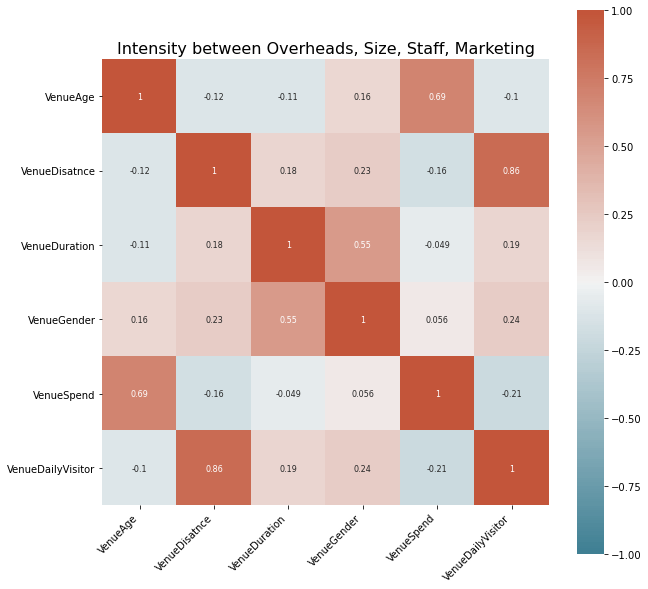

In [173]:
#HeatMap

print(combined_data.head())

plt.figure(figsize=(10, 10))
corr = combined_data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Intensity between Overheads, Size, Staff, Marketing', fontsize=16)

plt.show()

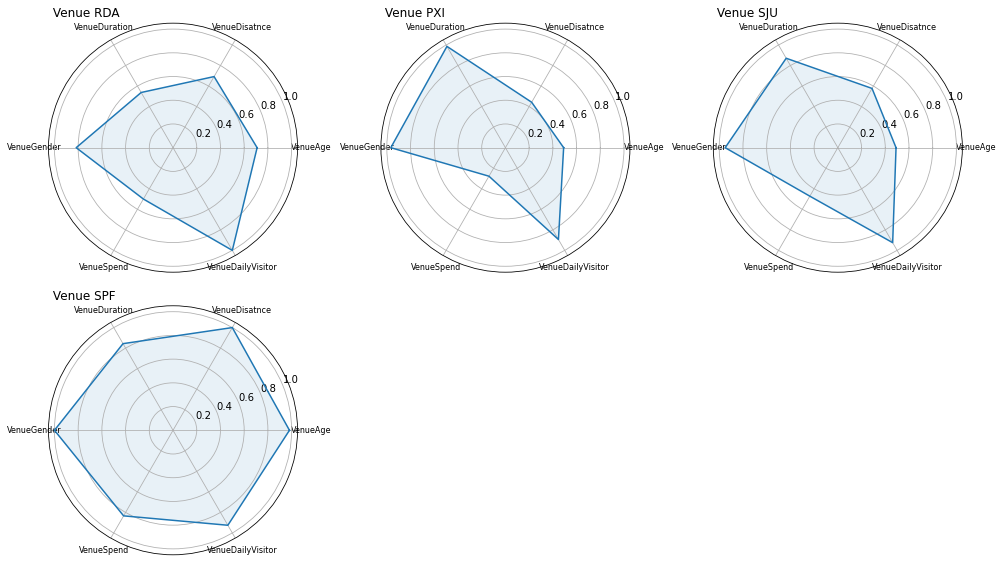

In [174]:
#radar plot

normalised_data = combined_data / combined_data.max()

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(14, 8))
counter = 1
for name in HighSelected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(2, 3, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns, fontsize=8)
    sub.set_title(' Venue ' + name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.show()

In [175]:

variables_title = '### Variables'
variables = list(combined_data.columns)
def get_summary_plots(variable_x, variable_y, variable_z, bubble_scaling):
    combined_data['BubbleSize'] = combined_data[variable_z] / combined_data[variable_z].max() * math.exp(bubble_scaling)
    return combined_data.hvplot.scatter(frame_height=250, frame_width=500,
                                       title=variable_x + ' vs ' + variable_y + ' (vs ' + variable_z + ')',
                                       alpha=0.5, hover_cols='all', padding=0.1,
                                       x=variable_x, y=variable_y, size='BubbleSize') 

def update_variables_row(event):
    variables_row[1].object = get_summary_plots(variable_x.value, variable_y.value, variable_z.value, bubble_scaling.value)

variable_x = pn.widgets.Select(name='X-axis', options=variables, value=variables[0], width=200)
variable_y = pn.widgets.Select(name='Y-axis', options=variables, value=variables[1], width=200)
variable_z = pn.widgets.Select(name='Bubble', options=variables, value=variables[2], width=200)
bubble_scaling = pn.widgets.IntSlider(name='Bubble scaling', value=5, start=0, end=10, width=200)

variables_row = pn.Row(
    pn.Column(variables_title, variable_x, variable_y, variable_z, bubble_scaling),
    get_summary_plots(variable_x.value, variable_y.value, variable_z.value, bubble_scaling.value)
)


variable_x.param.watch(update_variables_row, 'value')
variable_y.param.watch(update_variables_row, 'value')
variable_z.param.watch(update_variables_row, 'value')
bubble_scaling.param.watch(update_variables_row, 'value')

variables_row.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='X-axis', options=['VenueAge', 'VenueDisatnc...], value='VenueAge', width=200)
        [2] Select(name='Y-axis', options=['VenueAge', 'VenueDisatnc...], value='VenueDisatnce', width=200)
        [3] Select(name='Bubble', options=['VenueAge', 'VenueDisatnc...], value='VenueDuration', width=200)
        [4] IntSlider(end=10, name='Bubble scaling', value=5, width=200)
    [1] HoloViews(Scatter)

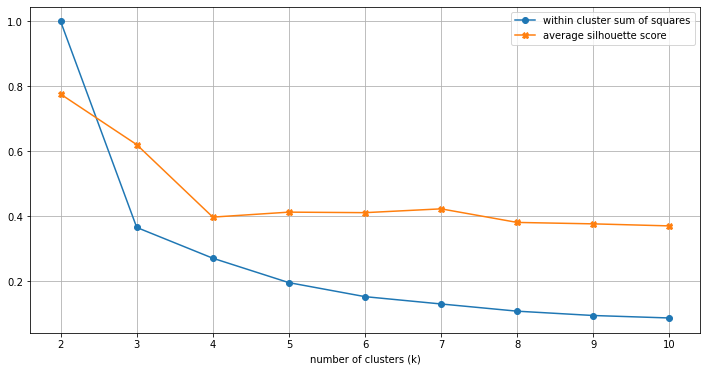

In [176]:
combined_data.drop('BubbleSize', inplace= True, axis=1)
selected = combined_data.columns 
min_k = 2
max_k = 10
k_values = range(min_k, max_k + 1)
WCSS = []
silhouette = []
for k in k_values:
    k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
    labels = k_means.fit_predict(combined_data[selected])
    WCSS.append(k_means.inertia_)
    silhouette.append(silhouette_score(combined_data[selected], labels))
WCSS = np.asarray(WCSS) / max(WCSS)

plt.figure(figsize=(12, 6))
plt.plot(k_values, WCSS, marker='o', label='within cluster sum of squares')
plt.plot(k_values, silhouette, marker='X', label='average silhouette score')
plt.xlabel('number of clusters (k)')
plt.legend()
plt.grid()
plt.show()

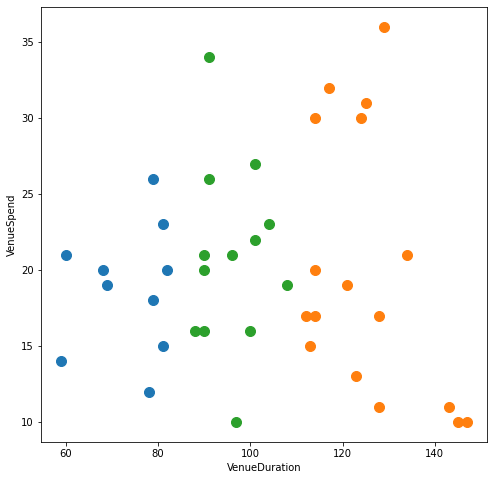

In [177]:
k=3
selected = combined_data.columns

selected = ['VenueDuration', 'VenueSpend']
k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
combined_data['label'] = k_means.fit_predict(combined_data[selected])

clusters = []
for c in range(k):
    clusters.append(combined_data[combined_data['label'] == c])

plt.figure(figsize=(8, 8))
for c in range(k):
    plt.scatter(clusters[c]['VenueDuration'], clusters[c]['VenueSpend'], s=100)
#for i, name in enumerate(summary_data.index):
    #plt.annotate(name, (summary_data['Revenue'][i] + 500, summary_data['Hits'][i]))
plt.xlabel('VenueDuration')
plt.ylabel('VenueSpend')
plt.show()